# Library imports

In [1]:
import pandas as pd
import numpy as np
import inflection
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from IPython.display import Image


# Data import and basic inspection

##  <font color="#808080">data loading and checking</font>

In [2]:
df_train = pd.read_csv('/home/gustavo/repos/Rossmann/train.csv', low_memory=False)

df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
# Checking data dimensions

print('\nData dimensions:\n')
print('Number of rows:{}'.format(df_train.shape[0]))
print('Number of columns:{}'.format(df_train.shape[1]))


Data dimensions:

Number of rows:1017209
Number of columns:9


In [4]:
df_store = pd.read_csv('/home/gustavo/repos/Rossmann/store.csv', low_memory=False)

df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# Checking data dimensions

print('\nData dimensions:\n')
print('Number of rows:{}'.format(df_store.shape[0]))
print('Number of columns:{}'.format(df_store.shape[1]))


Data dimensions:

Number of rows:1115
Number of columns:10


In [6]:
# Merging df's

df = pd.merge(df_train, df_store, how='left', on='Store')

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
# Checking data dimensions after merging

print('\nData dimensions:\n')
print('Number of rows:{}'.format(df.shape[0]))
print('Number of columns:{}'.format(df.shape[1]))


Data dimensions:

Number of rows:1017209
Number of columns:18


In [8]:
# Checking data types

df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [9]:
# Changing column 'DayOfWeek' to datetime

df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Adjusting column names

df.columns = list(map(lambda x: inflection.underscore(x), df.columns)) #changing to underscore + lower(snakecase)

## <font color="#808080">filling out NA's</font>

In [11]:
# Checking % of missing values

df.isna().sum() / df.shape[0]

store                           0.000000
day_of_week                     0.000000
date                            0.000000
sales                           0.000000
customers                       0.000000
open                            0.000000
promo                           0.000000
state_holiday                   0.000000
school_holiday                  0.000000
store_type                      0.000000
assortment                      0.000000
competition_distance            0.002597
competition_open_since_month    0.317878
competition_open_since_year     0.317878
promo2                          0.000000
promo2_since_week               0.499436
promo2_since_year               0.499436
promo_interval                  0.499436
dtype: float64

In [12]:
# Filling NA's on 'competition_distance' column ===========================================


## LÓGICA USADA: se a distância está NA assumiu-se que a distância da loja concorrente é muita alta.
### então foi feito o preenchimento por um valor acima da distância mais alta do dataset

df['competition_distance'] = df['competition_distance'].apply(lambda x: 200000.0 if pd.isna(x) else x)



# Filling NA's on 'competition_open_since_month' column ==================================


## LÓGICA USADA: completou-se o valor NA usando o mês da coluna 'date' (data da venda) da respectiva linha

df['competition_open_since_month'] = df[['date','competition_open_since_month']].apply(lambda x: x['date'].month if pd.isna(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)



# Filling NA's on 'competition_open_since_year' column =====================================


## LÓGICA USADA: completou-se o valor NA usando o ano da coluna 'date' (data da venda) da respectiva linha

df['competition_open_since_year'] = df[['date','competition_open_since_year']].apply(lambda x: x['date'].year if pd.isna(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)



# Filling NA's on 'promo2_since_week' column =================================================

## LÓGICA USADA: todos os valores onde a coluna promo2 estavam 0 (não houve promoção na loja) a coluna
### 'promo2_since_week' estava NA, então assumiu-se que não houve promoção nessa loja e preencheu-se com 0

df['promo2_since_week'] = df['promo2_since_week'].fillna(0)



# Filling NA's on 'promo2_since_year' column ===================================================

## LÓGICA USADA: todos os valores onde a coluna promo2 estavam 0 (não houve promoção na loja) a coluna
### 'promo2_since_year' estava NA, então assumiu-se que não houve promoção nessa loja e preencheu-se com 0

df['promo2_since_year'] = df['promo2_since_year'].fillna(0)




# Filling NA's on 'promo_interval' column ========================================================

## LÓGICA USADA: todos os valores onde a coluna promo2 estavam 0 (não houve promoção na loja) a coluna
### 'promo_interval' estava NA, então assumiu-se que não houve promoção nessa loja e preencheu-se com 0

df['promo_interval'] = df['promo_interval'].fillna(0)



# Abaixo será criado um dicionário que auxiliará na conversão dos meses de números em letras:

# criando mapeamento dos meses
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}


# criado a coluna 'month_map'
## LÒGICA: extraíu-se o mês (em número) da coluna 'date' e converteu-se em mês (em palavra) colocando em uma nova
### coluna

df['month_map'] = df['date'].dt.month.map(month_map)


# criando a coluna 'is_promo'
# LÓGICA: Se o dia da venda (coluna 'data') estiver em um mês onde foi feita a promoção (coluna 'promo_interval')
## então será atribuído 1 na nova coluna 'is_promo', se não tiver promoção ou a venda tiver sido feita em um mês
## fora da promoção então o valor atribuído será 0

df['is_promo'] = df[['month_map', 'promo_interval']].apply(lambda x: 0 if x['promo_interval']==0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)


In [13]:
# There is no more NA's in the dataset

df.isna().sum() / df.shape[0]

store                           0.0
day_of_week                     0.0
date                            0.0
sales                           0.0
customers                       0.0
open                            0.0
promo                           0.0
state_holiday                   0.0
school_holiday                  0.0
store_type                      0.0
assortment                      0.0
competition_distance            0.0
competition_open_since_month    0.0
competition_open_since_year     0.0
promo2                          0.0
promo2_since_week               0.0
promo2_since_year               0.0
promo_interval                  0.0
month_map                       0.0
is_promo                        0.0
dtype: float64

In [14]:
# Changing data types after previous columns creation

## columns 'competition_open_since_month','competition_open_since_year','promo2_since_week','promo2_since_year'
## need to be changed to int64

df.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [15]:
# Changing data types after previous columns creation

df[['competition_open_since_month',
    'competition_open_since_year',
    'promo2_since_week',
    'promo2_since_year']] = df[['competition_open_since_month',
                                'competition_open_since_year',
                                'promo2_since_week',
                                'promo2_since_year']].astype(int)

## <font color="#808080">descriptive statistics</font>

In [16]:
# Separando df com atributos númericos e categóricos

num_attrib = df.select_dtypes(include=['float64','int64'])

cat_attrib = df.select_dtypes(exclude=['float64','int64','datetime64[ns]'])

In [17]:
# Descriptive statistics

pd.DataFrame(data=[num_attrib.apply(np.min),
          num_attrib.apply(np.max),
          num_attrib.apply(lambda x: np.max(x) - np.min(x)),
          num_attrib.apply(np.mean),
          num_attrib.apply(np.median),
          num_attrib.apply(np.std),
          num_attrib.apply(lambda x: x.skew()),
          num_attrib.apply(lambda x: x.kurtosis())],
             
             index=np.array(['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']))

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000,200000.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,1.000000
range,1114.000000,6.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000,199980.000000,11.000000,115.000000,1.000000,50.000000,2015.000000,1.000000
mean,558.429727,3.998341,5773.818972,633.145946,0.830107,0.381515,0.178647,5935.442677,6.786849,2010.324840,0.500564,11.647665,1007.010608,0.171835
median,558.000000,4.000000,5744.000000,609.000000,1.000000,0.000000,0.000000,2330.000000,7.000000,2012.000000,1.000000,1.000000,2009.000000,0.000000
std,321.908493,1.997390,3849.924283,464.411506,0.375539,0.485758,0.383056,12547.646829,3.311085,5.515591,0.500000,15.323921,1005.876436,0.377237
skew,-0.000955,0.001593,0.641460,1.598650,-1.758045,0.487838,1.677842,10.242344,-0.042076,-7.235657,-0.002255,1.003390,-0.002251,1.739838
kurtosis,-1.200524,-1.246873,1.778375,7.091773,1.090723,-1.762018,0.815154,147.789712,-1.232607,124.071304,-1.999999,-0.498322,-1.999993,1.027039


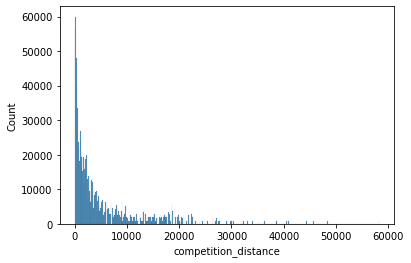

In [18]:
# Numeric atribute view:

# Exploring 'competition_distance'

sns.histplot(df.loc[df['competition_distance']<75000, 'competition_distance']);

<AxesSubplot:xlabel='sales', ylabel='Count'>

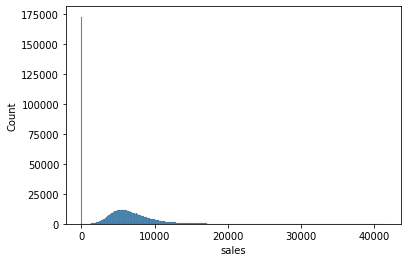

In [19]:
# Numeric atribute view:

# Exploring 'sales'

sns.histplot(df['sales'])

<AxesSubplot:xlabel='customers', ylabel='Count'>

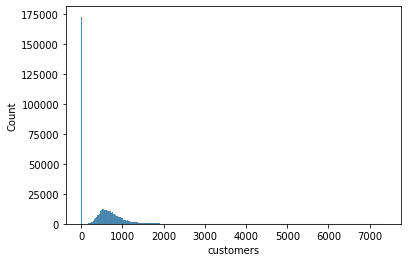

In [20]:
# Numeric atribute view:

# Exploring 'customers'

sns.histplot(df['customers'])

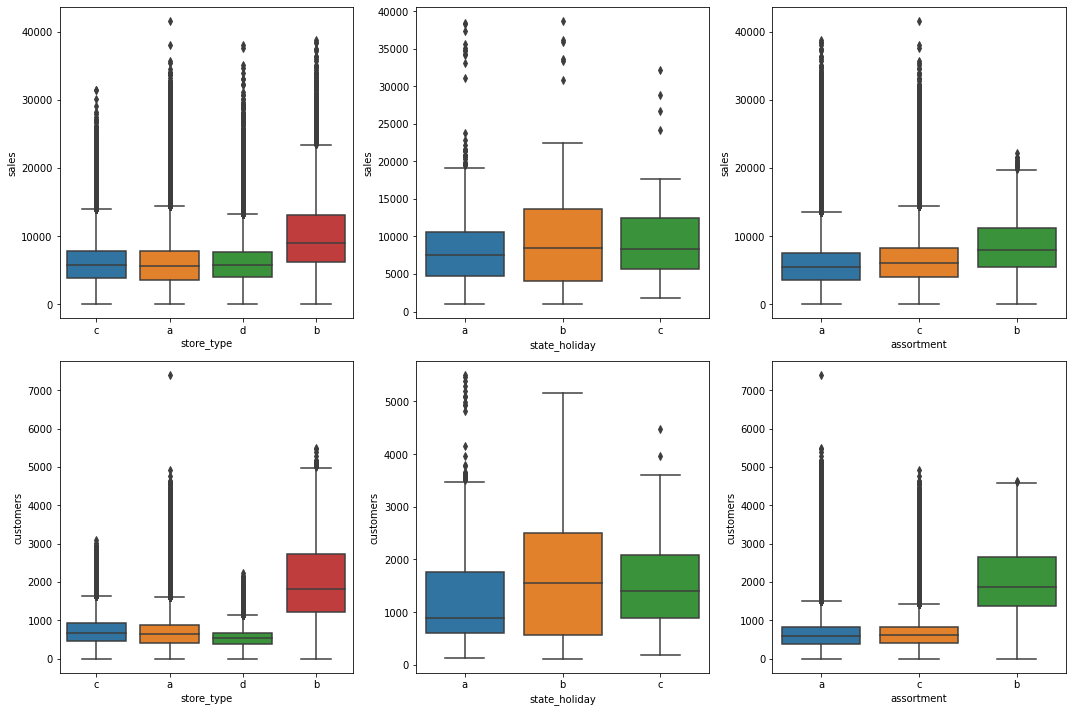

In [21]:
# Categorical atribute view:

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(x=df['store_type'], y=df['sales'], data=df)

plt.subplot(2,3,2)
sns.boxplot(x=df.loc[(df['state_holiday']!='0') & (df['sales']>0), 'state_holiday'], y=df['sales'], data=df)

plt.subplot(2,3,3)
sns.boxplot(x=df['assortment'], y=df['sales'], data=df)



plt.subplot(2,3,4)
sns.boxplot(x=df['store_type'], y=df['customers'], data=df)

plt.subplot(2,3,5)
sns.boxplot(x=df.loc[(df['state_holiday']!='0') & (df['customers']>0), 'state_holiday'], y=df['customers'], data=df)

plt.subplot(2,3,6)
sns.boxplot(x=df['assortment'], y=df['customers'], data=df)



plt.tight_layout()


# Feature engeneering

## <font color="#808080">mindmap de hipóteses</font>

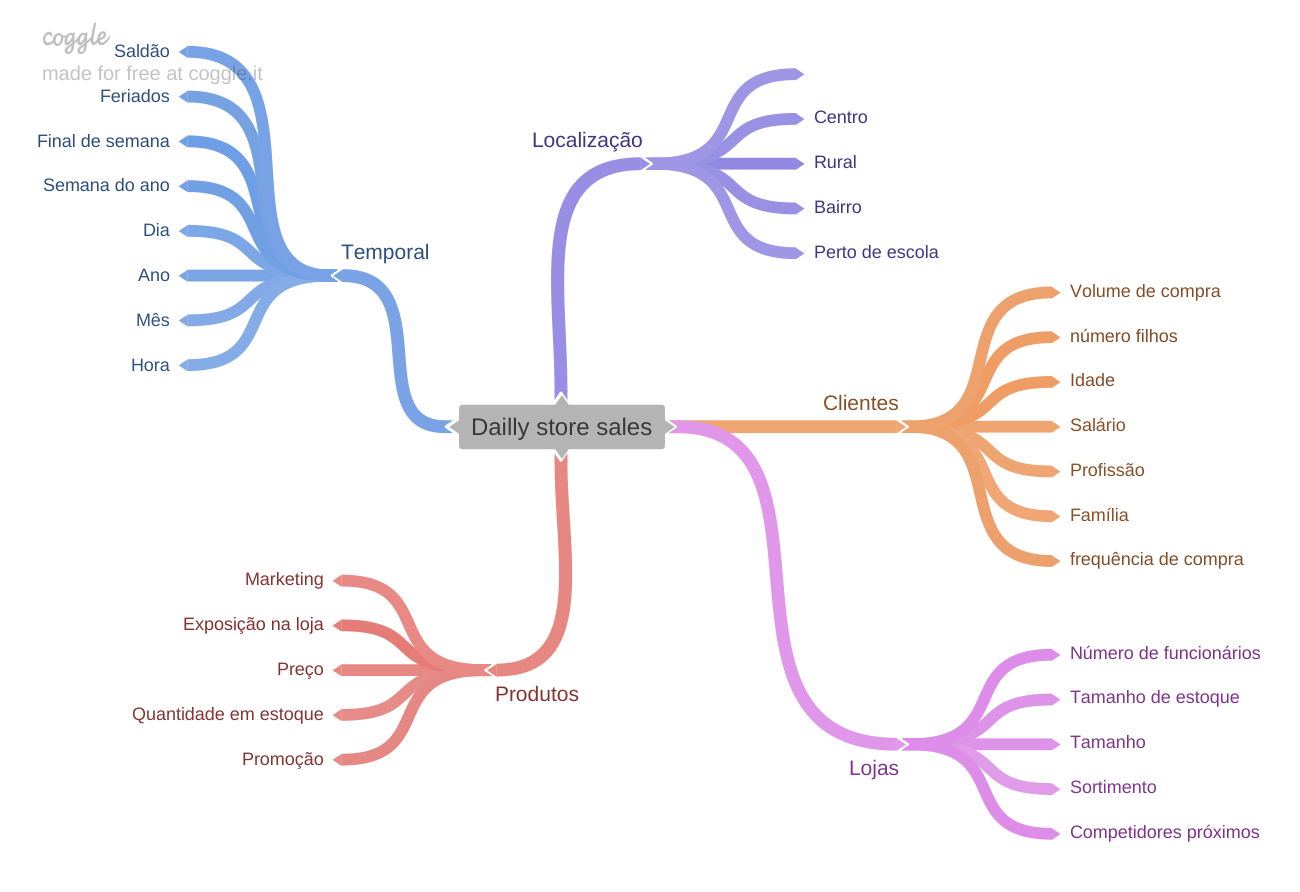

In [22]:
Image(filename='/home/gustavo/repos/Rossmann/Dailly_store_sales_mindmap.png')

## <font color="#808080">hipóteses à serem validadas com os dados presentes no dataset</font>

 <br></br>
 Nessa parte o mapa mental de hipóteses acima deve ser observado. 
 <br></br>

A partir dos atributos de cada entidade devem ser levantadas as hipóteses que impactam no fenômeno a ser modelado.

LÓGICA: Um aumento/diminuição no atributo x aumenta/diminui a quantidade de vendas.
<br></br>

As hipóteses levantadas são posteriormente validadas a partir dos dados disponíveis no dataset


Dessa forma, baseado nos dados disponíveis no dataset foram levantadas as seguintes hipóteses:
<br></br>

Entidade <em>Loja</em>:


**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.
<br></br>

Entidade <em>Produtos</em>:

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.
<br></br>

Entidade <em>Temporal</em>:

**8.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**9.** Lojas deveriam vender mais ao longo dos anos.

**10.** Lojas deveriam vender mais no segundo semestre do ano.

**11.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**12.** Lojas deveriam vender menos aos finais de semana.

**13.** Lojas deveriam vender menos durante os feriados escolares.

In [23]:
df_1 = df.copy()

In [24]:
# Changing column 'assortment'

df_1['assortment'] = df_1['assortment'].apply(lambda x:'basic' if x=='a' else 'extra' if x=='b' else 'extended')


# Changing column 'state_holiday'

df_1['state_holiday'] = df_1['state_holiday'].apply(lambda x:'Public holiday' if x=='a' else 'Easter' if x=='b' else 'Christmas' if x=='c' else 'regular day')


In [25]:
# Derivando novas variáveis:


# year

df_1['year'] = df_1['date'].dt.year


# month

df_1['month'] = df_1['date'].dt.month


# day

df_1['day'] = df_1['date'].dt.day


# week of year

df_1['week_of_year'] = df_1['date'].dt.weekofyear


# year week
 
df_1['year_week'] = df_1['date'].dt.strftime('%Y-%W') # esse comando apenas coleta a data da venda e muda a formatação




# competition_since (quanto tempo desde o início da competição ate a data da compra)

# 1o passo - juntar as colunas 'competition_open_since_month' com 'competition_open_since_year'

df_1['competition_since'] = df_1[['competition_open_since_year','competition_open_since_month']].apply(lambda x: datetime.datetime(year= x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)

# 2o passo - subtrair as datas de 'date' e 'competition_since' e dividir 30 (granularidade mês)
df_1['competition_time_month'] = ((df_1['date'] - df_1['competition_since'])/ 30).apply(lambda x: x.days).astype(int)




# promo2_since (quanto tempo desde a a promoção estar ativa até a data da compra)

# 1° passo: juntar a coluna 'promo2_since_year' com a coluna 'promo2_since_week' e armazenar em uma nova coluna
df_1['promo2_since'] = df_1.apply(lambda x: str(x['promo2_since_year']) + '-' + str(x['promo2_since_week']),axis=1)

# 2° passo: converter 'promo_since' de string para data
# OBSERVAÇÃO IMPORTANTE: tive que fazer uma adaptação no código.
# no código original a atribuição é feita sobre todas as linhas da coluna 'promo_since', no entanto o lambda
# não estava funcionando na coluna 'promo_since' nas linhas com valores zerados '0-0' (proveniente dos valores
# NA's que foram substituídos por 0 na etapa de preenchimento de NA's) então tive que aplicar a função no df
# filtrado (df_1['promo_since']!='0-0')
df_1.loc[df_1['promo2_since']!='0-0','promo2_since'] = df_1.loc[df_1['promo2_since']!='0-0','promo2_since'].apply(lambda x: datetime.datetime.strptime(x+'-1', '%Y-%W-%w') - datetime.timedelta(days=7) )

# 3° passo: subtrair a data da coluna 'date' da coluna 'promo_since' (criada no passo acima), mantendo o filtro
# condicional de linhas (df_1['promo_since']!='0-0') a atribuindo a uma nova coluna 'promo_time_week' mantendo
# o filtro de linhas
df_1.loc[df_1['promo2_since']!='0-0','promo2_time_week'] = ((df_1.loc[df_1['promo2_since']!='0-0','date'] - df_1.loc[df_1['promo2_since']!='0-0','promo2_since']) / 7).apply(lambda x: x.days).astype(int)

# 4° passo: os filtros de linha anteriores resultaram apenas em dados preenchidos nas linhas do filtro. As linhas
# não pertencentes ao filtro foram preenchidas com NA's. Preencher esses valores com 0
df_1['promo2_time_week'] = df_1['promo2_time_week'].fillna(0)



/tmp/ipykernel_15554/986586873.py:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_1['week_of_year'] = df_1['date'].dt.weekofyear
/home/gustavo/.pyenv/versions/3.8.0/envs/Rossmann/lib/python3.8/site-packages/pandas/core/arrays/datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


# Variable filtering and variable selection

<br></br>
<center>Variable filtering x Variable selection</center>
<br></br>

<div align="justify"><b>Variable filtering</b> - eliminação de variáveis baseada nas restrições do negócio.

ex: variáveis que estão disponíveis no dataset de treino mas não estarão em produção, no momento da previsão.
<br></br>

<b>Variable selection</b> - eliminação de variáveis irrelevantes para o aprendizado.

ex: nesse caso serão eliminadas as colunas auxiliares que foram criadas durante a manipulação dos dados</div>
<br></br>
<br></br>

<center>Eliminação de linhas</center>
<br></br>


<div align="justify">Também é importante eliminar as linhas irrelevantes no dataset.
ex: para esse caso serão eliminadas as linhas onde o valor na coluna 'open' é 0 (loja fechada).
As informações de venda nos dias em que a loja está fechada são irrelevantes.
Após essa etapa a coluna 'open' será também eliminada pois ela terá valor constante, sendo irrelevante para o aprendizado de máquina.</div>



## <font color="#808080">Seleção das linhas</font>

In [48]:
df_2 = df_1.copy()

In [52]:
# Quando a loja está fechada ('open'==0) a quantidade de vendas e clientes é 0. Eliminar essas linhas.
# eliminar também as linhas onde não houve vendas (df_2['sales']==0)

df_2 = df_2[(df_2['open']!=0) & (df_2['sales']>0)]

## <font color="#808080">Seleção das colunas</font>

In [53]:
# Eliminar a coluna 'customers' (no momento do modelo em produção a informação sobre a quantidade
# de clientes na loja não estará disponível).
# coluna 'open' estará com valor constante (1 - loja aberta)
# demais colunas são auxiliares

df_2 = df_2.drop(['customers','open','promo_interval','month_map'], axis=1)
